In [453]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [454]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [455]:
import os

In [456]:
#data = '/content/drive/MyDrive/Lab 7/archive'

In [457]:
train = '/content/drive/MyDrive/Lab 7/archive/train/'
test = '/content/drive/MyDrive/Lab 7/archive/test/'

In [458]:
def Classes_Count(path, name):
    Classes_Dict = {}
    for Class in os.listdir(path):
        Full_Path = os.path.join(path, Class)
        Classes_Dict[Class] = len(os.listdir(Full_Path))
    df = pd.DataFrame(Classes_Dict, index=[name])
    return df

In [459]:
Train_Count = Classes_Count(train, 'Train').transpose().sort_values(by="Train", ascending=False)
Test_Count = Classes_Count(test, 'Test').transpose().sort_values(by="Test", ascending=False)
pd.concat([Train_Count, Test_Count], axis=1)

,Train,Test
happy,7215.0,1774.0
neutral,4965.0,NaN
angry,3995.0,958.0
surprise,3171.0,NaN
disgust,436.0,111.0
train,2.0,NaN
test,2.0,NaN
sad,NaN,1247.0
fear,NaN,1024.0


In [460]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {
    'Emotion': ['happy', 'neutral', 'angry', 'surprise', 'disgust', 'train', 'test', 'sad', 'fear'],
    'Train': [7215.0, 4965.0, 3995.0, 3171.0, 436.0, 2.0, 2.0, None, None],
    'Test': [1774.0, None, 958.0, None, 111.0, None, None, 1247.0, 1024.0]
}
df = pd.DataFrame(data)

df['Target'] = df['Train'].fillna(0) + df['Test'].fillna(0)

label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Emotion'])

df = df.drop(df[(df['Emotion'] == 'train') | (df['Emotion'] == 'test')].index)

print(df)


    Emotion   Train    Test  Target
0     happy  7215.0  1774.0       3
1   neutral  4965.0     NaN       4
2     angry  3995.0   958.0       0
3  surprise  3171.0     NaN       6
4   disgust   436.0   111.0       1
7       sad     NaN  1247.0       5
8      fear     NaN  1024.0       2


In [461]:
train_df = df[df['Train'].notna()]
test_df = df[df['Test'].notna()]

X_train = train_df[['Train', 'Target']]
y_train = train_df['Emotion']

X_test = test_df[['Test', 'Target']]
y_test = test_df['Emotion']

print("Training dataset:")
print(X_train)
print("\nTesting dataset:")
print(X_test)

Training dataset:
    Train  Target
0  7215.0       3
1  4965.0       4
2  3995.0       0
3  3171.0       6
4   436.0       1

Testing dataset:
     Test  Target
0  1774.0       3
2   958.0       0
4   111.0       1
7  1247.0       5
8  1024.0       2


In [462]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, precision_recall_curve, recall_score
from sklearn.metrics import accuracy_score, f1_score
X_train = X_train.rename(columns={'Train': 'Feature', 'Target': 'Target'})
X_test = X_test.rename(columns={'Test': 'Feature', 'Target': 'Target'})


In [463]:
X_train

,Feature,Target
0,7215.0,3
1,4965.0,4
2,3995.0,0
3,3171.0,6
4,436.0,1


In [464]:
X_test

,Feature,Target
0,1774.0,3
2,958.0,0
4,111.0,1
7,1247.0,5
8,1024.0,2


In [465]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.4
F1 Score: 0.3
Precision: 0.26666666666666666
Recall: 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_

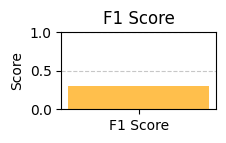

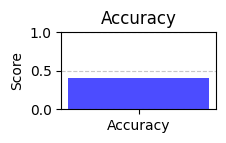

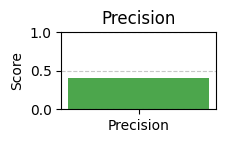

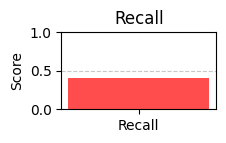

In [466]:
plt.figure(figsize=(2, 1))
plt.bar(['F1 Score'], [f1], color='orange', alpha=0.7)
plt.ylabel('Score')
plt.title('F1 Score')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Accuracy'], [accuracy], color='blue', alpha=0.7)
plt.ylabel('Score')
plt.title('Accuracy')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Precision'], [accuracy], color='green', alpha=0.7)
plt.ylabel('Score')
plt.title('Precision')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Recall'], [accuracy], color='red', alpha=0.7)
plt.ylabel('Score')
plt.title('Recall')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [467]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.2
F1 Score: 0.06666666666666668
Precision: 0.04
Recall: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


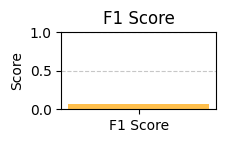

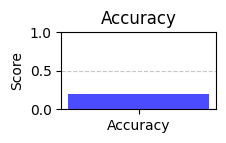

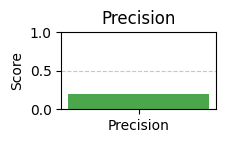

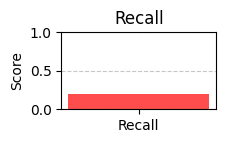

In [468]:
plt.figure(figsize=(2, 1))
plt.bar(['F1 Score'], [f1], color='orange', alpha=0.7)
plt.ylabel('Score')
plt.title('F1 Score')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Accuracy'], [accuracy], color='blue', alpha=0.7)
plt.ylabel('Score')
plt.title('Accuracy')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Precision'], [accuracy], color='green', alpha=0.7)
plt.ylabel('Score')
plt.title('Precision')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Recall'], [accuracy], color='red', alpha=0.7)
plt.ylabel('Score')
plt.title('Recall')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [469]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.2
F1 Score: 0.06666666666666668
Precision: 0.04
Recall: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


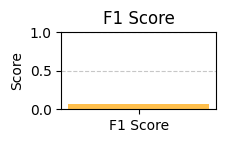

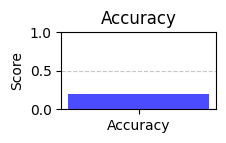

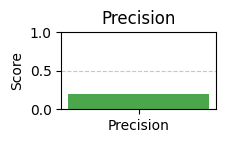

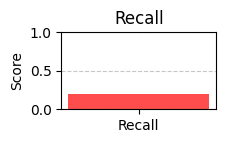

In [470]:
plt.figure(figsize=(2, 1))
plt.bar(['F1 Score'], [f1], color='orange', alpha=0.7)
plt.ylabel('Score')
plt.title('F1 Score')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Accuracy'], [accuracy], color='blue', alpha=0.7)
plt.ylabel('Score')
plt.title('Accuracy')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Precision'], [accuracy], color='green', alpha=0.7)
plt.ylabel('Score')
plt.title('Precision')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Recall'], [accuracy], color='red', alpha=0.7)
plt.ylabel('Score')
plt.title('Recall')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [471]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.2
F1 Score: 0.08
Precision: 0.05
Recall: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


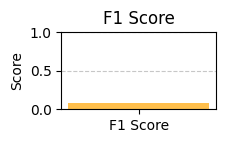

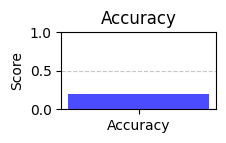

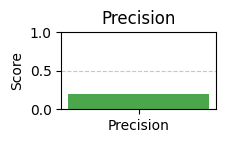

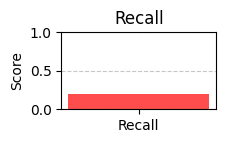

In [472]:
plt.figure(figsize=(2, 1))
plt.bar(['F1 Score'], [f1], color='orange', alpha=0.7)
plt.ylabel('Score')
plt.title('F1 Score')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Accuracy'], [accuracy], color='blue', alpha=0.7)
plt.ylabel('Score')
plt.title('Accuracy')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Precision'], [accuracy], color='green', alpha=0.7)
plt.ylabel('Score')
plt.title('Precision')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(2, 1))
plt.bar(['Recall'], [accuracy], color='red', alpha=0.7)
plt.ylabel('Score')
plt.title('Recall')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()